<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
#Importamos los datos

X_train = pd.read_csv("./DatosAbandonoSinPondSinNan/X_train.csv", sep=',', decimal='.')
y_train = pd.read_csv("./DatosAbandonoSinPondSinNan/y_train.csv", sep=',', decimal='.')
X_val = pd.read_csv("./DatosAbandonoSinPondSinNan/X_val.csv", sep=',', decimal='.')
y_val = pd.read_csv("./DatosAbandonoSinPondSinNan/y_val.csv", sep=',', decimal='.')
X_test = pd.read_csv("./DatosAbandonoSinPondSinNan/X_test.csv", sep=',', decimal='.')
y_test = pd.read_csv("./DatosAbandonoSinPondSinNan/y_test.csv", sep=',', decimal='.')


features = X_train.columns

In [12]:
from sklearn import preprocessing

#scaler = preprocessing.StandardScaler().fit(X_train)
scaler = preprocessing.Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Vemos si somos capaces de mejorar los algoritmos por defecto aplicando GridSearchCV

In [13]:
start_time = time.time()

dt = DecisionTreeClassifier(random_state = 0)

gs_dt = GridSearchCV(dt,
                    param_grid = {"max_depth" : range(2, 10), 
                                  "min_samples_split": range(4, 10, 2)},
                    scoring = None,
                    cv = 5)
gs_dt.fit(X_train, y_train)
gs_dt.best_estimator_

end_time = time.time()
print("Tiempo: ", end_time - start_time)


Tiempo:  19.14163327217102


In [14]:
gs_dt.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state=0)

In [15]:
gs_dt.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [16]:
start_time = time.time()

rf = RandomForestClassifier(random_state=0)
gs_rf = GridSearchCV(rf,
                    param_grid = {"max_depth": range(2,6), "min_samples_split": range(4,6,2), "n_estimators": range(100, 251, 50)},
                    scoring = None,
                    cv = 5)
gs_rf.fit(X_train, y_train)

end_time = time.time()
print("Tiempo: ", end_time - start_time)


Tiempo:  175.34063076972961


In [17]:
gs_rf.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_split=4, random_state=0)

In [18]:
gs_rf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [19]:
start_time = time.time()

et = ExtraTreesClassifier(random_state=0)
gs_et = GridSearchCV(et,
                    param_grid = {"max_depth": range(2,6), "min_samples_split": range(4,10,2), "n_estimators": range(100, 251, 50)},
                    scoring = None,
                    cv = 5)
gs_et.fit(X_train, y_train)

end_time = time.time()
print("Tiempo: ", end_time - start_time)


Tiempo:  110.93622946739197


In [20]:
gs_et.best_estimator_

ExtraTreesClassifier(max_depth=2, min_samples_split=4, random_state=0)

In [21]:
gs_et.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [22]:
print("DecisionTreeClassifier best score:", gs_dt.best_score_)
print("RandomForestClassifier best score:", gs_rf.best_score_)
print("ExtraTreesClassifier best score:", gs_et.best_score_)

DecisionTreeClassifier best score: 0.9743150897386341
RandomForestClassifier best score: 0.9744467986619136
ExtraTreesClassifier best score: 0.9743809442002739


In [23]:
grid_predictions_dt = gs_dt.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_dt))
print(confusion_matrix(y_test, grid_predictions_dt))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4652
           1       0.00      0.00      0.00       110
           2       0.00      0.00      0.00         6

    accuracy                           0.98      4768
   macro avg       0.33      0.33      0.33      4768
weighted avg       0.95      0.98      0.96      4768

[[4651    1    0]
 [ 110    0    0]
 [   5    1    0]]


In [24]:
grid_predictions_rf = gs_rf.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_rf))
print(confusion_matrix(y_test, grid_predictions_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4652
           1       0.00      0.00      0.00       110
           2       0.00      0.00      0.00         6

    accuracy                           0.98      4768
   macro avg       0.33      0.33      0.33      4768
weighted avg       0.95      0.98      0.96      4768

[[4652    0    0]
 [ 110    0    0]
 [   6    0    0]]


In [25]:
grid_predictions_et = gs_et.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions_et))
print(confusion_matrix(y_test, grid_predictions_et))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4652
           1       0.00      0.00      0.00       110
           2       0.00      0.00      0.00         6

    accuracy                           0.98      4768
   macro avg       0.33      0.33      0.33      4768
weighted avg       0.95      0.98      0.96      4768

[[4652    0    0]
 [ 110    0    0]
 [   6    0    0]]


In [26]:
from joblib import dump, load
dump(gs_dt, 'gs_dt_nor.joblib') 
dump(gs_rf, 'gs_rf_nor.joblib') 
dump(gs_et, 'gs_et_nor.joblib') 
dump(scaler, 'scaler_nor.joblib') 

['scaler_nor.joblib']

### Decision Tree Classifier

In [27]:
start_time = time.time()

dt = DecisionTreeClassifier(
    ccp_alpha = 0.0,
    class_weight = None,
    criterion = 'gini',
    max_depth = 3,
    max_features = None,
    max_leaf_nodes = None,
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 4,
    min_weight_fraction_leaf = 0.0,
    random_state =  0,
    splitter = 'best')

dt_score = cross_val_score(dt, X_train, y_train, cv = 5).mean()
end_time = time.time()
print("Tiempo: ", end_time - start_time)
print("Score: ", dt_score)

Tiempo:  0.4928257465362549
Score:  0.9743150897386341


In [28]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state=0)

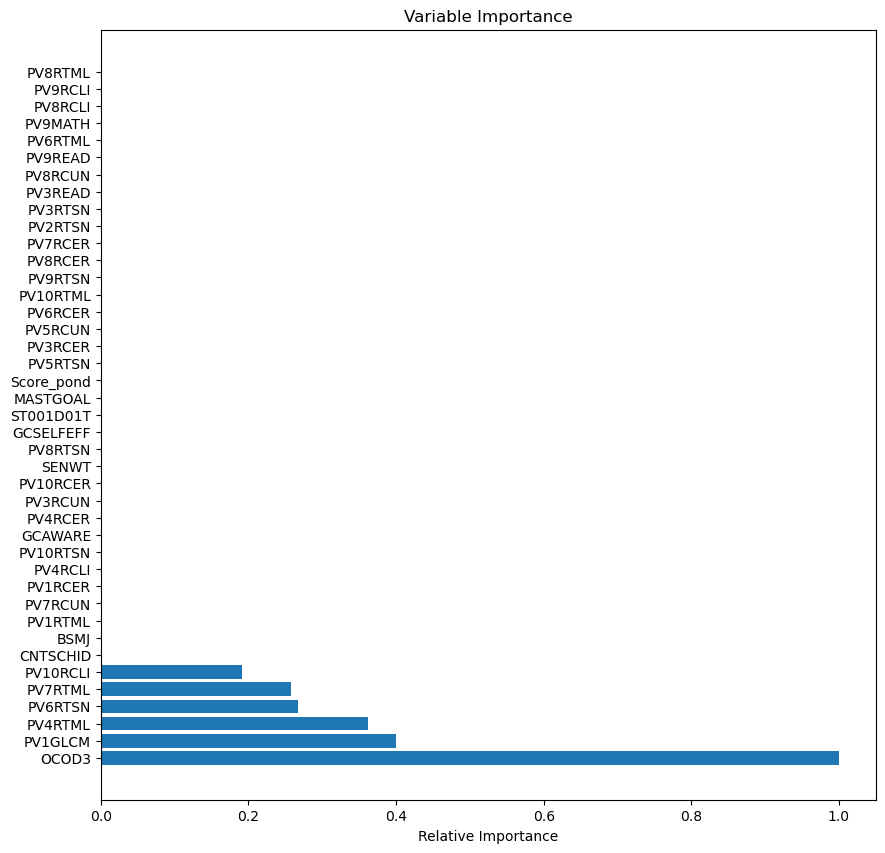

In [29]:
importances = dt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Esto es normal que ocurra porque el árbol de decisión no tiene encuenta nuestra variable para formar el árbol

### Random Forest Classifier

In [30]:
start_time = time.time()

#rf = RandomForestClassifier(max_depth=5, min_samples_split=4, random_state=0) 
rf = RandomForestClassifier(
    bootstrap = True,
    ccp_alpha = 0.0,
    class_weight = None,
    criterion = 'gini',
    max_depth = 3,
    max_features = 'sqrt',
    max_leaf_nodes = None,
    max_samples = None,
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 4,
    min_weight_fraction_leaf = 0.0,
    n_estimators =  100,
    n_jobs = None,
    oob_score = False,
    random_state = 0,
    verbose = 0,
    warm_start = False)

rf_score = cross_val_score(rf, X_train, y_train, cv = 10).mean()
end_time = time.time()
print("Tiempo: ", end_time - start_time)
print("Score: ", rf_score)

Tiempo:  12.21399712562561
Score:  0.9744468181254398


In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_split=4, random_state=0)

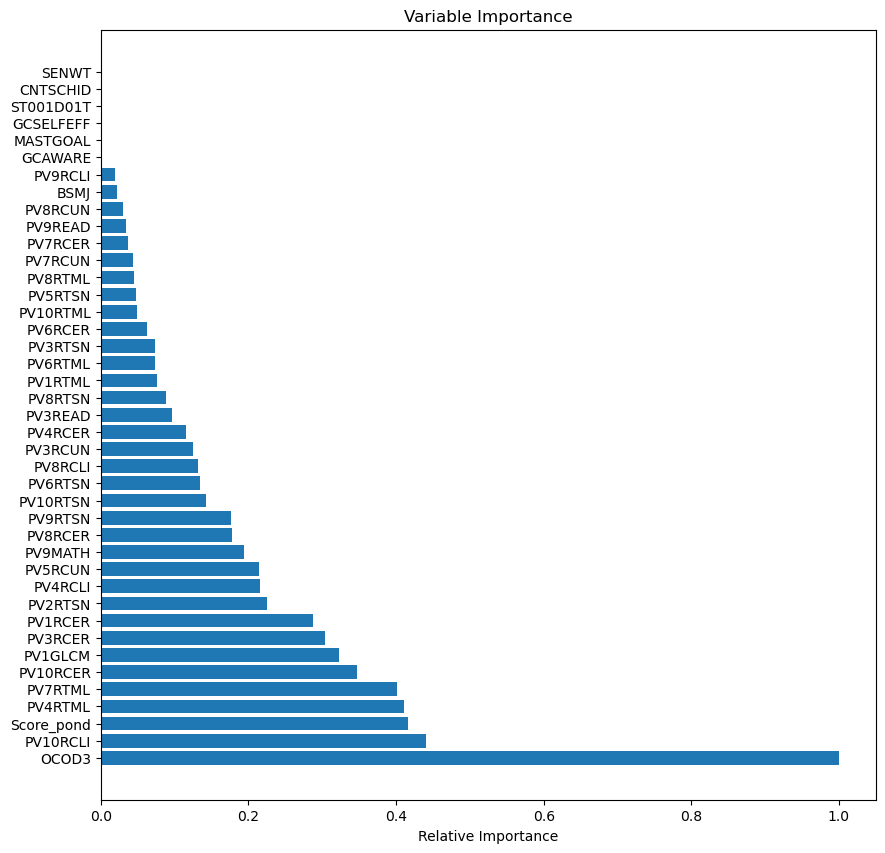

In [32]:
importances = rf.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [33]:
valores = list(zip(importances[indices], features[indices]))

def clave_ordenacion(tupla):
  return (-tupla[0], tupla[1])

sorted(valores, key=clave_ordenacion)

[(1.0, 'OCOD3'),
 (0.4407234332870977, 'PV10RCLI'),
 (0.41605700524400424, 'Score_pond'),
 (0.4113187036237868, 'PV4RTML'),
 (0.4016345044188558, 'PV7RTML'),
 (0.3471133745564121, 'PV10RCER'),
 (0.3222339157692896, 'PV1GLCM'),
 (0.3043458762434912, 'PV3RCER'),
 (0.2875177692318313, 'PV1RCER'),
 (0.22507475537317756, 'PV2RTSN'),
 (0.21496622917955807, 'PV4RCLI'),
 (0.21479995564681867, 'PV5RCUN'),
 (0.19428803688540575, 'PV9MATH'),
 (0.1773500240712602, 'PV8RCER'),
 (0.17649705763436854, 'PV9RTSN'),
 (0.14232709302434088, 'PV10RTSN'),
 (0.13427069378787065, 'PV6RTSN'),
 (0.13099891869849786, 'PV8RCLI'),
 (0.12523010222540135, 'PV3RCUN'),
 (0.11561982595791216, 'PV4RCER'),
 (0.0957882164281055, 'PV3READ'),
 (0.08872420210558506, 'PV8RTSN'),
 (0.07604931710232102, 'PV1RTML'),
 (0.07395408314213896, 'PV6RTML'),
 (0.07272344266774858, 'PV3RTSN'),
 (0.06199748468305095, 'PV6RCER'),
 (0.04895406292334834, 'PV10RTML'),
 (0.04830059931746796, 'PV5RTSN'),
 (0.04520811698503271, 'PV8RTML'),
 (0.0

### Extra Trees Classifier

In [34]:
start_time = time.time()

et = ExtraTreesClassifier( 
    bootstrap = False,
    ccp_alpha = 0.0,
    class_weight = None,
    criterion = 'gini',
    max_depth = 2,
    max_features = 'sqrt',
    max_leaf_nodes = None,
    max_samples = None,
    min_impurity_decrease = 0.0,
    min_samples_leaf = 1,
    min_samples_split = 4,
    min_weight_fraction_leaf = 0.0,
    n_estimators =  100,
    n_jobs = None,
    oob_score = False,
    random_state = 0,
    verbose = 0,
    warm_start = False)
 

et_score = cross_val_score(et, X_train, y_train, cv = 10).mean()
end_time = time.time()
print("Tiempo: ", end_time - start_time)
print("Score: ", et_score)

Tiempo:  2.161867380142212
Score:  0.9743809419726072


In [35]:
et.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=2, min_samples_split=4, random_state=0)

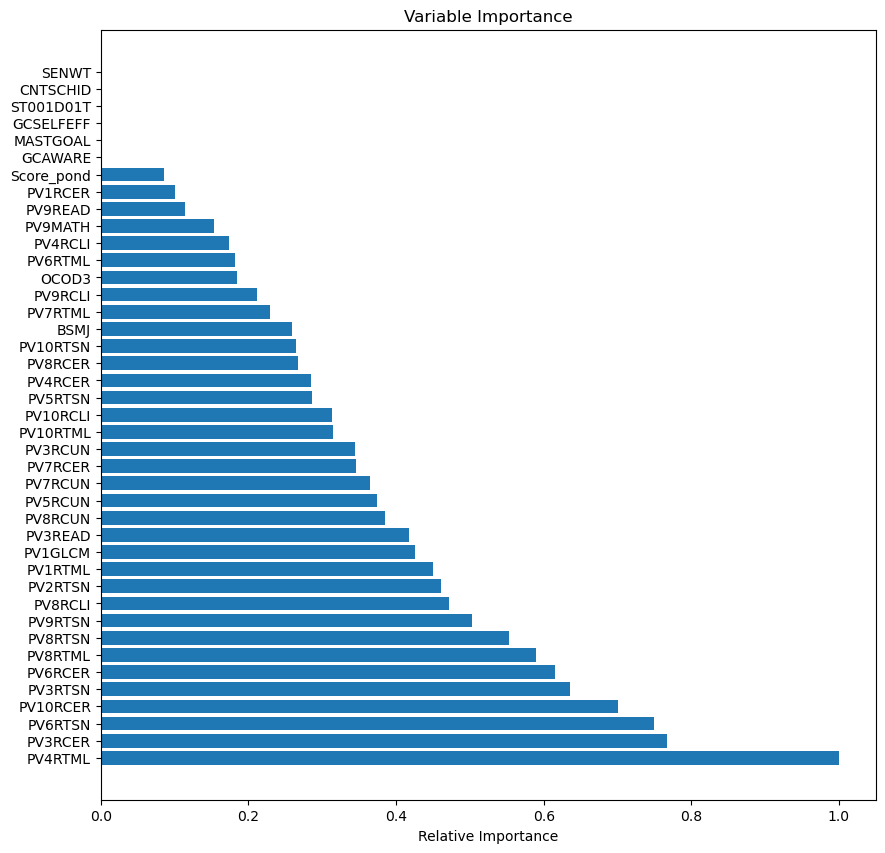

In [36]:
importances = et.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]


plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [37]:
valores = list(zip(importances[indices], features[indices]))

def clave_ordenacion(tupla):
  return (-tupla[0], tupla[1])

sorted(valores, key=clave_ordenacion)

[(1.0, 'PV4RTML'),
 (0.7671075603091528, 'PV3RCER'),
 (0.7500553357001195, 'PV6RTSN'),
 (0.7000950888658873, 'PV10RCER'),
 (0.635711155485744, 'PV3RTSN'),
 (0.6150594313171266, 'PV6RCER'),
 (0.588962446663044, 'PV8RTML'),
 (0.5533447639003132, 'PV8RTSN'),
 (0.5030102493794324, 'PV9RTSN'),
 (0.4716008923403573, 'PV8RCLI'),
 (0.46063242152954265, 'PV2RTSN'),
 (0.4500622646899405, 'PV1RTML'),
 (0.4258722900872455, 'PV1GLCM'),
 (0.41739151150495457, 'PV3READ'),
 (0.3846220739129723, 'PV8RCUN'),
 (0.3742247600549717, 'PV5RCUN'),
 (0.36529511002907117, 'PV7RCUN'),
 (0.3460963588648602, 'PV7RCER'),
 (0.34388613501383875, 'PV3RCUN'),
 (0.31464962764477467, 'PV10RTML'),
 (0.3126457889264144, 'PV10RCLI'),
 (0.2864078022777878, 'PV5RTSN'),
 (0.284115138296643, 'PV4RCER'),
 (0.26654831155256026, 'PV8RCER'),
 (0.26440598856219466, 'PV10RTSN'),
 (0.2593954910993022, 'BSMJ'),
 (0.2288055121408259, 'PV7RTML'),
 (0.2118496754318178, 'PV9RCLI'),
 (0.18423592632224495, 'OCOD3'),
 (0.18131258409144274, 'P

In [38]:
from joblib import dump, load
dump(dt, 'dt_nor.joblib') 
dump(rf, 'rf_nor.joblib') 
dump(et, 'et_nor.joblib') 
dump(scaler, 'scaler_nor.joblib') 

['scaler_nor.joblib']

In [39]:
#!pip install pipreqs

In [40]:
#!pip freeze > requirements.txt

In [41]:
#!pip freeze 

In [42]:
""" %%writefile requirements.txt

apache-beam[gcp]==2.24.0
tensorflow
gensim==3.6.0
fsspec==0.8.4
gcsfs==0.7.1
numpy==1.20.0 """

' %%writefile requirements.txt\n\napache-beam[gcp]==2.24.0\ntensorflow\ngensim==3.6.0\nfsspec==0.8.4\ngcsfs==0.7.1\nnumpy==1.20.0 '

In [43]:
#!pip install -r requirements.txt